In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MultipleLocator

In [2]:
df_training=pd.read_csv('Matrix/Synergy_Analysis/Training_set.csv')
df_prediction=pd.read_csv('Matrix/Synergy_Analysis/experimental_result.csv')

In [3]:
df_prediction.columns

Index(['BlockId', 'Gamma Experiment', 'AssayId', 'Size', 'RowSid', 'RowName',
       'RowTarget', 'ColSid', 'ColName', 'ColTarget', 'RowIC50', 'ColIC50',
       'RowConcs', 'ColConcs', 'RowConcUnit', 'ColConcUnit'],
      dtype='object')

In [4]:
df_training.columns

Index(['Sample ID 1', 'Structure 1', 'Log AC50 (M) 1', 'Sample Name 1',
       'MOA 1', 'Sample ID 2', 'Structure 2', 'Log AC50 (M) 2',
       'Sample Name 2', 'MOA 2', 'Gamma', 'Label'],
      dtype='object')

In [5]:
df_prediction_colname_edited=\
df_prediction.rename(columns={'Gamma Experiment':'Gamma',
                              'RowName': 'Sample Name 1',
                              'ColName':'Sample Name 2',
                              'RowTarget':'MOA 1',
                              'ColTarget':'MOA 2'})\
                                [['Gamma','Sample Name 1','Sample Name 2','MOA 1','MOA 2']].copy()

In [6]:
df_training_colname_edited=\
df_training[['Gamma','Sample Name 1','Sample Name 2','MOA 1','MOA 2']].copy()

In [7]:
df_prediction_colname_edited_synergistic=df_prediction_colname_edited[df_prediction_colname_edited['Gamma']<0.95]
df_training_colname_edited_synergistic=df_training_colname_edited[df_training_colname_edited['Gamma']<0.95]

In [8]:
print(
    len(df_training_colname_edited),
    len(df_training_colname_edited_synergistic),
    len(df_prediction_colname_edited),
    len(df_prediction_colname_edited_synergistic))

496 256 88 51


In [9]:
# Make sure training set and predictions do not have overlapping pairs
df_aux1=df_prediction_colname_edited_synergistic[['Sample Name 1','Sample Name 2']]
df_aux2=df_training_colname_edited_synergistic[['Sample Name 1','Sample Name 2']]
pd.merge(df_aux1.apply(sorted, axis=1).apply(pd.Series), df_aux2.apply(sorted, axis=1).apply(pd.Series), how='inner')

,0,1


In [10]:
df_train_pred_syn=pd.concat([df_training_colname_edited_synergistic,df_prediction_colname_edited_synergistic])
df_train_pred_syn.shape

(307, 5)

In [12]:
df_train_pred_syn.sort_values(by='Gamma').to_csv('307_synergisitc_combos.csv',index=False)

In [40]:
# for index, row in df_train_pred_syn.iterrows():
#     comp1=row['Sample Name 1']
#     comp2=row['Sample Name 2']
#     if 'clax' in comp1 or 'clax' in comp2:
#         print(f"{comp1}, {comp2}, {row['Gamma']}, {row['MOA 1']}, {row['MOA 2']}")

In [41]:
# for index, row in df_train_pred_syn.iterrows():
#     moa1=row['MOA 1']
#     moa2=row['MOA 2']
#     if 'Bcl' in moa1 or 'Bcl' in moa2:
#         print(f"{row['Sample Name 1']}, {row['Sample Name 2']}, {moa1}, {moa2}, {row['Gamma']}")

In [13]:
df_train_pred_syn[df_train_pred_syn['Gamma']<0.5].shape

(26, 5)

In [14]:
comp_pairs = [(row['Sample Name 1'], row['Sample Name 2']) for _ignore,row in df_train_pred_syn.iterrows()]

In [15]:
comps = [comp for pair in comp_pairs for comp in pair]
comp_counter = Counter(comps)
comp_counter

Counter({'GMX-1778': 18,
         'Daporinad': 15,
         'KX-01': 13,
         'Bortezomib': 22,
         'Panobinostat': 24,
         'Carfilzomib': 53,
         'Fascaplysin': 18,
         'Oprozomib': 21,
         'CAY-10581': 21,
         'GW-843682X': 12,
         'BMS-3': 15,
         'BI-2536': 22,
         'Parogrelil': 14,
         'GSK-461364A': 10,
         'Osanetant': 13,
         'RGB-286147': 26,
         'HMSL10077': 14,
         'Dinaciclib (SCH727965)': 23,
         'NSC-319726': 35,
         'IVX-214': 10,
         'BS-194': 12,
         'Akt-I-1,2': 16,
         'JS-59-4': 15,
         'Sepantronium bromide': 27,
         'CPG-52364': 14,
         'Pralatrexate': 5,
         'Volasertib': 14,
         'Methotrexate': 4,
         'MK-1775': 20,
         'Aminopterin': 6,
         'Niacin': 4,
         'NCGC00188382-01': 20,
         'AZD-8055': 2,
         'Lestaurtinib': 1,
         'UCN-01': 3,
         'JQ1': 2,
         'Trichostatin A': 9,
         'Delanzomi

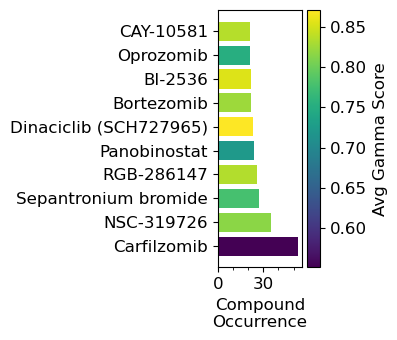

In [16]:
# Get the top 10 most common compounds and their counts
top_10_comps = comp_counter.most_common(10)

# Sort the top 10 compounds by count in descending order
comp_names, comp_counts = zip(*top_10_comps)

# Calculate mean Gamma for each compound
mean_gammas = {
    comp: df_train_pred_syn[(df_train_pred_syn['Sample Name 1'] == comp) | 
                            (df_train_pred_syn['Sample Name 2'] == comp)]['Gamma'].mean()
    for comp in comp_names
}

# Get the mean Gamma values corresponding to the top 10 compounds
mean_gamma_values = [mean_gammas[comp] for comp in comp_names]

# Normalize mean_gamma_values for coloring
norm = plt.Normalize(min(mean_gamma_values), max(mean_gamma_values))
colors = plt.cm.viridis(norm(mean_gamma_values))

# Create the plot with fig, ax
fig, ax = plt.subplots(figsize=(3.8, 3.5))

# Plot the horizontal bar chart
bars = ax.barh(comp_names, comp_counts, color=colors)

# Set labels and title with font size 12
ax.set_xlabel('Compound\nOccurrence', fontsize=12)
#ax.set_ylabel('Compound Name', fontsize=12)
# ax.set_title('Top 10 Most Occurring Compounds (Color Coded by Mean Gamma)', fontsize=12)

ax.xaxis.set_major_locator(MultipleLocator(30))
ax.xaxis.set_minor_locator(MultipleLocator(10))

# Add a color bar for the Gamma values
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
cbar.set_label('Avg Gamma Score', fontsize=12)

# Set the font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)
cbar.ax.tick_params(labelsize=12)
# Adjust layout to include all elements within the figure
fig.tight_layout()

# Save the figure as a PNG with bounding box adjusted
filename = 'compound_frequency_bar_chart.png'
#fig.savefig(filename, bbox_inches='tight', dpi=300)

# # Load the saved image to check its size in inches
# from PIL import Image

# with Image.open(filename) as img:
#     width, height = img.size
#     print(f"Final saved figure size: {width / 300:.2f} inches x {height / 300:.2f} inches (at 300 dpi)")

In [17]:
for index,row in df_train_pred_syn.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if ('319726' in comp2) and ('8055' in comp1):
        print(index)
df_train_pred_syn.loc[[0]]

0


,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2
0,0.78286,AZD-8055,NSC-319726,mTORC1/2 Inhibitor,Mutant p53 Activator


In [18]:
mechanism_pairs = [(row['MOA 1'], row['MOA 2']) for _ignore,row in df_train_pred_syn.iterrows()]

In [19]:
mechanism_pairs

[('IKK beta Inhibitor', 'NAMPT Inhibitor'),
 ('Src Kinase Inhibitor', 'NAMPT Inhibitor'),
 ('Proteasome Inhibitor', 'NAMPT Inhibitor'),
 ('HDAC Inhibitor', 'NAMPT Inhibitor'),
 ('Proteasome Inhibitor', 'NAMPT Inhibitor'),
 ('CDK4/6 Inhibitor', 'NAMPT Inhibitor'),
 ('Proteasome Inhibitor', 'NAMPT Inhibitor'),
 ('IDO Inhibitor', 'NAMPT Inhibitor'),
 ('Polo-like Kinase-1 (Plk-1) Inhibitor', 'NAMPT Inhibitor'),
 ('LIMK Inhibitor', 'NAMPT Inhibitor'),
 ('Polo-like Kinase-1 (Plk-1) Inhibitor', 'NAMPT Inhibitor'),
 ('Phosphodiesterase III/Va (PDE) Inhibitor', 'NAMPT Inhibitor'),
 ('Polo-like Kinase-1 (Plk-1) Inhibitor', 'NAMPT Inhibitor'),
 ('Tachykinin NK3 Antagonist', 'NAMPT Inhibitor'),
 ('Src Kinase Inhibitor', 'CDK1/2/3/7/9 Inhibitor'),
 ('BTK Inhibitor', 'CDK1/2/3/7/9 Inhibitor'),
 ('CDK1/2/5/9 Inhibitor', 'CDK1/2/3/7/9 Inhibitor'),
 ('CDK4/6 Inhibitor', 'CDK1/2/3/7/9 Inhibitor'),
 ('Mutant p53 Activator', 'CDK1/2/3/7/9 Inhibitor'),
 ('Polo-like Kinase-1 (Plk-1) Inhibitor', 'CDK1/2/3/7/

In [20]:
mechanisms = [mech for pair in mechanism_pairs for mech in pair]
mech_counter = Counter(mechanisms)

In [21]:
mechanisms

['IKK beta Inhibitor',
 'NAMPT Inhibitor',
 'Src Kinase Inhibitor',
 'NAMPT Inhibitor',
 'Proteasome Inhibitor',
 'NAMPT Inhibitor',
 'HDAC Inhibitor',
 'NAMPT Inhibitor',
 'Proteasome Inhibitor',
 'NAMPT Inhibitor',
 'CDK4/6 Inhibitor',
 'NAMPT Inhibitor',
 'Proteasome Inhibitor',
 'NAMPT Inhibitor',
 'IDO Inhibitor',
 'NAMPT Inhibitor',
 'Polo-like Kinase-1 (Plk-1) Inhibitor',
 'NAMPT Inhibitor',
 'LIMK Inhibitor',
 'NAMPT Inhibitor',
 'Polo-like Kinase-1 (Plk-1) Inhibitor',
 'NAMPT Inhibitor',
 'Phosphodiesterase III/Va (PDE) Inhibitor',
 'NAMPT Inhibitor',
 'Polo-like Kinase-1 (Plk-1) Inhibitor',
 'NAMPT Inhibitor',
 'Tachykinin NK3 Antagonist',
 'NAMPT Inhibitor',
 'Src Kinase Inhibitor',
 'CDK1/2/3/7/9 Inhibitor',
 'BTK Inhibitor',
 'CDK1/2/3/7/9 Inhibitor',
 'CDK1/2/5/9 Inhibitor',
 'CDK1/2/3/7/9 Inhibitor',
 'CDK4/6 Inhibitor',
 'CDK1/2/3/7/9 Inhibitor',
 'Mutant p53 Activator',
 'CDK1/2/3/7/9 Inhibitor',
 'Polo-like Kinase-1 (Plk-1) Inhibitor',
 'CDK1/2/3/7/9 Inhibitor',
 'LIM

In [22]:
mech_counter

Counter({'IKK beta Inhibitor': 18,
         'NAMPT Inhibitor': 15,
         'Src Kinase Inhibitor': 13,
         'Proteasome Inhibitor': 113,
         'HDAC Inhibitor': 36,
         'CDK4/6 Inhibitor': 18,
         'IDO Inhibitor': 21,
         'Polo-like Kinase-1 (Plk-1) Inhibitor': 68,
         'LIMK Inhibitor': 15,
         'Phosphodiesterase III/Va (PDE) Inhibitor': 14,
         'Tachykinin NK3 Antagonist': 13,
         'CDK1/2/3/7/9 Inhibitor': 26,
         'BTK Inhibitor': 14,
         'CDK1/2/5/9 Inhibitor': 35,
         'Mutant p53 Activator': 35,
         'AKT Inhibitor': 16,
         'nitric oxide donors': 15,
         'Survivin Inhibitor': 27,
         'TLR 7, 8 and 9 Antagonist': 14,
         'Dihydrofolate Reductase (DHFR) Inhibitors': 5,
         'Dihydrofolate Reductase (DHFR) Inhibitor': 10,
         'Wee1 Kinase Inhibitor': 20,
         'Nicotinic acid': 4,
         'ITK inhibitor': 20,
         'mTORC1/2 Inhibitor': 2,
         'Jak/Tyk/Flt Inhibitor': 1,
         'Un

In [23]:
abbreviation_dict=\
{'LIMK ': 'LIMK',
 'AKT Inhibitor': 'AKT',
 '5-HT2A Antagonists': '5-HT2A',
 'HDAC Inhibitor': 'HDAC',
 'Nicotinic acid': 'NicAcid',
 'Mutant p53 Activator': 'mut-p53',
 'Dietary supplement & part of traditional chinese medicines; alkaloid known to have several pharmacological effects including anti-tumor activity; inducer of apoptosis': 'Diet-\nSupp',
 'Dihydrofolate Reductase (DHFR) Inhibitors': 'DHFR',
 'Mutant IDH1 Inhibitor': 'mut-IDH1',
 'Src Kinase Inhibitor': 'Src',
 'NOS2 Expression Inhibitor': 'NOS2',
 'Brd4 Inhibitor': 'BRD4',
 'ITK inhibitor': 'ITK',
 'RIP1 Kinase Inhibitor': 'RIP1',
 'Survivin Inhibitor': 'Survivin',
 'IDO Inhibitor': 'IDO',
 'NAMPT Inhibitor': 'NAMPT',
 'IKK beta Inhibitor': r'IKK$\beta$',
 'Jak/Tyk/Flt Inhibitor': 'JAK,TYK,FLT',
 'Nuclear export Inhibitor': 'NucExp',
 'Wee1 Kinase Inhibitor': 'Wee1',
 'Phosphodiesterase III/Va (PDE) Inhibitor': 'PDE',
 'Polo-like Kinase-1 (Plk-1) Inhibitor': 'PLK1',
 'Unknown': 'Unknown',
 'Farnesoid X Receptor Agonist': 'FXR',
 'mTORC1/2 Inhibitor': 'mTORC1,2',
 'IAP Inhibitor': 'IAP',
 'CDK1/2/3/7/9 Inhibitor': 'CDK1,2,3,7,9',
 'TLR 7, 8, 9 Antagonist': 'TLR7,8,9',
 'GSK-3 Inhibitor': 'GSK3',
 'PKC Inhibitor': 'PKC',
 'Protein kinase C theta Inhibitor': 'PRKCT',
 'PARP Inhibitor': 'PARP',
 'MDM2 (hdm2) Inhibitor': 'MDM2',
 'Bcl-xL Inhibitor': 'Bcl-xL',
 'CDK1/2/5/9 Inhibitor': 'CDK1,2,5,9',
 'Proteasome Inhibitor': 'Proteasome',
 'alpha2-Adrenoceptor Antagonist': r'$\alpha$2-'+'\nAdrenoceptor',
 'Isocitrate dehydrogenase inhibitor': 'IDH',
 'Cardiac glycoside': 'Cardi-glyc',
 'Tachykinin NK3 Antagonist': 'NK3R',
 'Cyclooxygenase-2 Inhibitor': 'COX2',
 'PI3K Inhibitor': 'PI3K',
 'nitric oxide donors': 'nitric oxide donors',
 'CDK4/6 Inhibitor': 'CDK4,6',
 'BTK Inhibitor': 'BTK'}

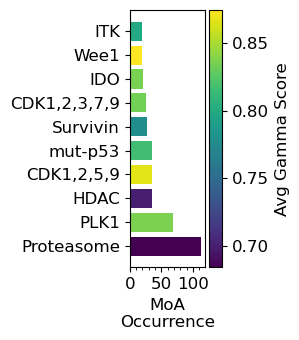

In [24]:
# Get the top 10 most common MoA and their counts
top_10_moas = mech_counter.most_common(10)

# Sort the top 10 compounds by count in descending order
moa_names, moa_counts = zip(*top_10_moas)

# Calculate mean Gamma for each compound
mean_gammas = {
    moa: df_train_pred_syn[(df_train_pred_syn['MOA 1'] == moa) | 
                            (df_train_pred_syn['MOA 2'] == moa)]['Gamma'].mean()
    for moa in moa_names
}

# Get the mean Gamma values corresponding to the top 10 MoAs
mean_gamma_values = [mean_gammas[moa] for moa in moa_names]

# Normalize mean_gamma_values for coloring
norm = plt.Normalize(min(mean_gamma_values), max(mean_gamma_values))
colors = plt.cm.viridis(norm(mean_gamma_values))

# Create the plot with fig, ax
fig, ax = plt.subplots(figsize=(3., 3.5))

moa_names = [abbreviation_dict.get(moa, moa) for moa in moa_names]

# Plot the horizontal bar chart
bars = ax.barh(moa_names, moa_counts, color=colors)

# Set labels and title with font size 12
ax.set_xlabel('MoA\nOccurrence', fontsize=12)
#ax.set_ylabel('Compound Name', fontsize=12)
# ax.set_title('Top 10 Most Occurring Compounds (Color Coded by Mean Gamma)', fontsize=12)

ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))

# Add a color bar for the Gamma values
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
cbar.set_label('Avg Gamma Score', fontsize=12)

# Set the font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)
cbar.ax.tick_params(labelsize=12)
# Adjust layout to include all elements within the figure
fig.tight_layout()

# Save the figure as a PNG with bounding box adjusted
filename = 'moa_frequency_bar_chart.png'
#fig.savefig(filename, bbox_inches='tight', dpi=300)

# # Load the saved image to check its size in inches
# from PIL import Image

# with Image.open(filename) as img:
#     width, height = img.size
#     print(f"Final saved figure size: {width / 300:.2f} inches x {height / 300:.2f} inches (at 300 dpi)")

In [596]:
# G = nx.Graph()

In [597]:
# for mech in mech_counter:
#     G.add_node(mech, size=mech_counter[mech])

In [598]:
# for mech1, mech2 in mechanism_pairs:
#     if G.has_edge(mech1, mech2):
#         G[mech1][mech2]['weight'] += 1
#     else:
#         G.add_edge(mech1, mech2, weight=1)

In [599]:
# plt.figure(figsize=(20, 20))

# # Position nodes using the spring layout
# pos = nx.spring_layout(G, k=0.5, seed=42)
# sizes = [G.nodes[node]['size'] * 20 for node in G.nodes]
# nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')
# weights = [G[u][v]['weight'] for u, v in G.edges]
# nx.draw_networkx_edges(G, pos, width=weights)
# nx.draw_networkx_labels(G, pos, font_size=5)

In [600]:
text='?'
for moa in df_train_pred_syn['MOA 1']:
    if text in moa:
        print('MOA 1: ',moa)
for moa in df_train_pred_syn['MOA 2']:
    if text in moa:
        print('MOA 2: ',moa)

MOA 1:  5-HT2A Antagonists?


In [601]:
text='?'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])

MOA 1:  60 5-HT2A Antagonists?


In [602]:
df_train_pred_syn.loc[60,'MOA 1']

'5-HT2A Antagonists?'

In [603]:
df_train_pred_syn.at[60,'MOA 1']='5-HT2A Antagonists'

In [604]:
text='DHFR'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])

MOA 1:  85 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  110 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  162 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  300 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  306 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 1:  366 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  109 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  110 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  135 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  300 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  301 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  306 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  312 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  315 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  324 Dihydrofolate Reductase (DHFR) Inhibitor


In [605]:
text='Dihydrofolate Reductase (DHFR) Inhibitor'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])
        df_train_pred_syn.at[index,'MOA 1']='Dihydrofolate Reductase (DHFR) Inhibitors'       

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])
        df_train_pred_syn.at[index,'MOA 2']='Dihydrofolate Reductase (DHFR) Inhibitors'

MOA 1:  85 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  110 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  162 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  300 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  306 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 1:  366 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  109 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  110 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  135 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  300 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  301 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  306 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  312 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  315 Dihydrofolate Reductase (DHFR) Inhibitor
MOA 2:  324 Dihydrofolate Reductase (DHFR) Inhibitor


In [606]:
text='Dihydrofolate Reductase (DHFR) Inhibitor'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])
        df_train_pred_syn.at[index,'MOA 1']='Dihydrofolate Reductase (DHFR) Inhibitors'       

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])
        df_train_pred_syn.at[index,'MOA 2']='Dihydrofolate Reductase (DHFR) Inhibitors'

MOA 1:  85 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  110 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  162 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  300 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  306 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 1:  366 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  109 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  110 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  135 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  300 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  301 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  306 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  312 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  315 Dihydrofolate Reductase (DHFR) Inhibitors
MOA 2:  324 Dihydrofolate Reductase (DHFR) Inhibitors


In [607]:
text='TLR'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])

MOA 1:  65 TLR 7, 8 and 9 Antagonist
MOA 1:  204 TLR 7, 8 and 9 Antagonist
MOA 1:  336 TLR 7, 8 and 9 Antagonist
MOA 1:  433 TLR 7, 8 and 9 Antagonist
MOA 2:  139 TLR 7, 8 and 9 Antagonist
MOA 2:  143 TLR 7, 8 and 9 Antagonist
MOA 2:  144 TLR 7, 8 and 9 Antagonist
MOA 2:  145 TLR 7, 8 and 9 Antagonist
MOA 2:  146 TLR 7, 8 and 9 Antagonist
MOA 2:  148 TLR 7, 8 and 9 Antagonist
MOA 2:  149 TLR 7, 8 and 9 Antagonist
MOA 2:  151 TLR 7, 8 and 9 Antagonist
MOA 2:  156 TLR 7, 8 and 9 Antagonist
MOA 2:  158 TLR 7, 8 and 9 Antagonist


In [608]:
text='TLR'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])
        df_train_pred_syn.at[index,'MOA 1']='TLR 7, 8, 9 Antagonist'       

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])
        df_train_pred_syn.at[index,'MOA 2']='TLR 7, 8, 9 Antagonist'

MOA 1:  65 TLR 7, 8 and 9 Antagonist
MOA 1:  204 TLR 7, 8 and 9 Antagonist
MOA 1:  336 TLR 7, 8 and 9 Antagonist
MOA 1:  433 TLR 7, 8 and 9 Antagonist
MOA 2:  139 TLR 7, 8 and 9 Antagonist
MOA 2:  143 TLR 7, 8 and 9 Antagonist
MOA 2:  144 TLR 7, 8 and 9 Antagonist
MOA 2:  145 TLR 7, 8 and 9 Antagonist
MOA 2:  146 TLR 7, 8 and 9 Antagonist
MOA 2:  148 TLR 7, 8 and 9 Antagonist
MOA 2:  149 TLR 7, 8 and 9 Antagonist
MOA 2:  151 TLR 7, 8 and 9 Antagonist
MOA 2:  156 TLR 7, 8 and 9 Antagonist
MOA 2:  158 TLR 7, 8 and 9 Antagonist


In [609]:
text='TLR'
for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 1']:
        print('MOA 1: ',index,row['MOA 1'])
        df_train_pred_syn.at[index,'MOA 1']='TLR 7, 8, 9 Antagonist'       

for index,row in df_train_pred_syn.iterrows():
    if text in row['MOA 2']:
        print('MOA 2: ',index,row['MOA 2'])
        df_train_pred_syn.at[index,'MOA 2']='TLR 7, 8, 9 Antagonist'

MOA 1:  65 TLR 7, 8, 9 Antagonist
MOA 1:  204 TLR 7, 8, 9 Antagonist
MOA 1:  336 TLR 7, 8, 9 Antagonist
MOA 1:  433 TLR 7, 8, 9 Antagonist
MOA 1:  65 TLR 7, 8, 9 Antagonist
MOA 2:  139 TLR 7, 8, 9 Antagonist
MOA 2:  143 TLR 7, 8, 9 Antagonist
MOA 2:  144 TLR 7, 8, 9 Antagonist
MOA 2:  145 TLR 7, 8, 9 Antagonist
MOA 2:  146 TLR 7, 8, 9 Antagonist
MOA 2:  148 TLR 7, 8, 9 Antagonist
MOA 2:  149 TLR 7, 8, 9 Antagonist
MOA 2:  151 TLR 7, 8, 9 Antagonist
MOA 2:  156 TLR 7, 8, 9 Antagonist
MOA 2:  158 TLR 7, 8, 9 Antagonist


In [76]:
abbreviation_dict=\
{'LIMK': 'LIMK',
 'AKT Inhibitor': 'AKT',
 '5-HT2A Antagonists': '5-HT2A',
 'HDAC Inhibitor': 'HDAC',
 'Nicotinic acid': 'NicAcid',
 'Mutant p53 Activator': 'mut-p53',
 'Dietary supplement & part of traditional chinese medicines; alkaloid known to have several pharmacological effects including anti-tumor activity; inducer of apoptosis': 'Diet-\nSupp',
 'Dihydrofolate Reductase (DHFR) Inhibitors': 'DHFR',
 'Mutant IDH1 Inhibitor': 'mut-IDH1',
 'Src Kinase Inhibitor': 'Src',
 'NOS2 Expression Inhibitor': 'NOS2',
 'Brd4 Inhibitor': 'BRD4',
 'ITK inhibitor': 'ITK',
 'RIP1 Kinase Inhibitor': 'RIP1',
 'Survivin Inhibitor': 'Survivin',
 'IDO Inhibitor': 'IDO',
 'NAMPT Inhibitor': 'NAMPT',
 'IKK beta Inhibitor': r'IKK$\beta$',
 'Jak/Tyk/Flt Inhibitor': 'JAK,TYK,FLT',
 'Nuclear export Inhibitor': 'NucExp',
 'Wee1 Kinase Inhibitor': 'Wee1',
 'Phosphodiesterase III/Va (PDE) Inhibitor': 'PDE',
 'Polo-like Kinase-1 (Plk-1) Inhibitor': 'PLK1',
 'Unknown': 'Unknown',
 'Farnesoid X Receptor Agonist': 'FXR',
 'mTORC1/2 Inhibitor': 'mTORC1,2',
 'IAP Inhibitor': 'IAP',
 'CDK1/2/3/7/9 Inhibitor': 'CDK1,2,3,7,9',
 'TLR 7, 8, 9 Antagonist': 'TLR7,8,9',
 'GSK-3 Inhibitor': 'GSK3',
 'PKC Inhibitor': 'PKC',
 'Protein kinase C theta Inhibitor': 'PRKCT',
 'PARP Inhibitor': 'PARP',
 'MDM2 (hdm2) Inhibitor': 'MDM2',
 'Bcl-xL Inhibitor': 'Bcl-xL',
 'CDK1/2/5/9 Inhibitor': 'CDK1,2,5,9',
 'Proteasome Inhibitor': 'Proteasome',
 'alpha2-Adrenoceptor Antagonist': r'$\alpha$2-'+'\nAdrenoceptor',
 'Isocitrate dehydrogenase inhibitor': 'IDH',
 'Cardiac glycoside': 'Cardi-glyc',
 'Tachykinin NK3 Antagonist': 'NK3R',
 'Cyclooxygenase-2 Inhibitor': 'COX2',
 'PI3K Inhibitor': 'PI3K',
 'nitric oxide donors': 'nitric oxide donors',
 'CDK4/6 Inhibitor': 'CDK4,6',
 'BTK Inhibitor': 'BTK'}

In [78]:
for item in sorted(abbreviation_dict.keys()):
    if item!=abbreviation_dict[item]:
        print(f"{item}, {abbreviation_dict[item]}; ",end='')

5-HT2A Antagonists, 5-HT2A; AKT Inhibitor, AKT; BTK Inhibitor, BTK; Bcl-xL Inhibitor, Bcl-xL; Brd4 Inhibitor, BRD4; CDK1/2/3/7/9 Inhibitor, CDK1,2,3,7,9; CDK1/2/5/9 Inhibitor, CDK1,2,5,9; CDK4/6 Inhibitor, CDK4,6; Cardiac glycoside, Cardi-glyc; Cyclooxygenase-2 Inhibitor, COX2; Dietary supplement & part of traditional chinese medicines; alkaloid known to have several pharmacological effects including anti-tumor activity; inducer of apoptosis, Diet-
Supp; Dihydrofolate Reductase (DHFR) Inhibitors, DHFR; Farnesoid X Receptor Agonist, FXR; GSK-3 Inhibitor, GSK3; HDAC Inhibitor, HDAC; IAP Inhibitor, IAP; IDO Inhibitor, IDO; IKK beta Inhibitor, IKK$\beta$; ITK inhibitor, ITK; Isocitrate dehydrogenase inhibitor, IDH; Jak/Tyk/Flt Inhibitor, JAK,TYK,FLT; MDM2 (hdm2) Inhibitor, MDM2; Mutant IDH1 Inhibitor, mut-IDH1; Mutant p53 Activator, mut-p53; NAMPT Inhibitor, NAMPT; NOS2 Expression Inhibitor, NOS2; Nicotinic acid, NicAcid; Nuclear export Inhibitor, NucExp; PARP Inhibitor, PARP; PI3K Inhibit

Text(0.91, 0.593, '$\\alpha$2-\nAdrenoceptor: alpha2-Adrenoceptor Antagonist\n5-HT2A: 5-HT2A Antagonists\nAKT: AKT Inhibitor\nBcl-xL: Bcl-xL Inhibitor\nBRD4: Brd4 Inhibitor\nBTK: BTK Inhibitor\nCardi-glyc: Cardiac glycoside\nCDK1,2,3,7,9: CDK1/2/3/7/9 Inhibitor\nCDK1,2,5,9: CDK1/2/5/9 Inhibitor\nCDK4,6: CDK4/6 Inhibitor\nCOX2: Cyclooxygenase-2 Inhibitor\nDHFR: Dihydrofolate Reductase (DHFR) Inhibitors\nDiet-\nSupp: Dietary supplement \nFXR: Farnesoid X Receptor Agonist\nGSK3: GSK-3 Inhibitor\nHDAC: HDAC Inhibitor\nIAP: IAP Inhibitor\nIDH: Isocitrate dehydrogenase inhibitor\nIDO: IDO Inhibitor\nIKK$\\beta$: IKK beta Inhibitor\nITK: ITK inhibitor\nJAK,TYK,FLT: Jak/Tyk/Flt Inhibitor\nLIMK: LIMK \nMDM2: MDM2 (hdm2) Inhibitor\nmTORC1,2: mTORC1/2 Inhibitor\nmut-IDH1: Mutant IDH1 Inhibitor\nmut-p53: Mutant p53 Activator\nNAMPT: NAMPT Inhibitor\nNicAcid: Nicotinic acid\nnitric oxide donors: nitric oxide donors\nNK3R: Tachykinin NK3 Antagonist\nNOS2: NOS2 Expression Inhibitor\nNucExp: Nuclear e

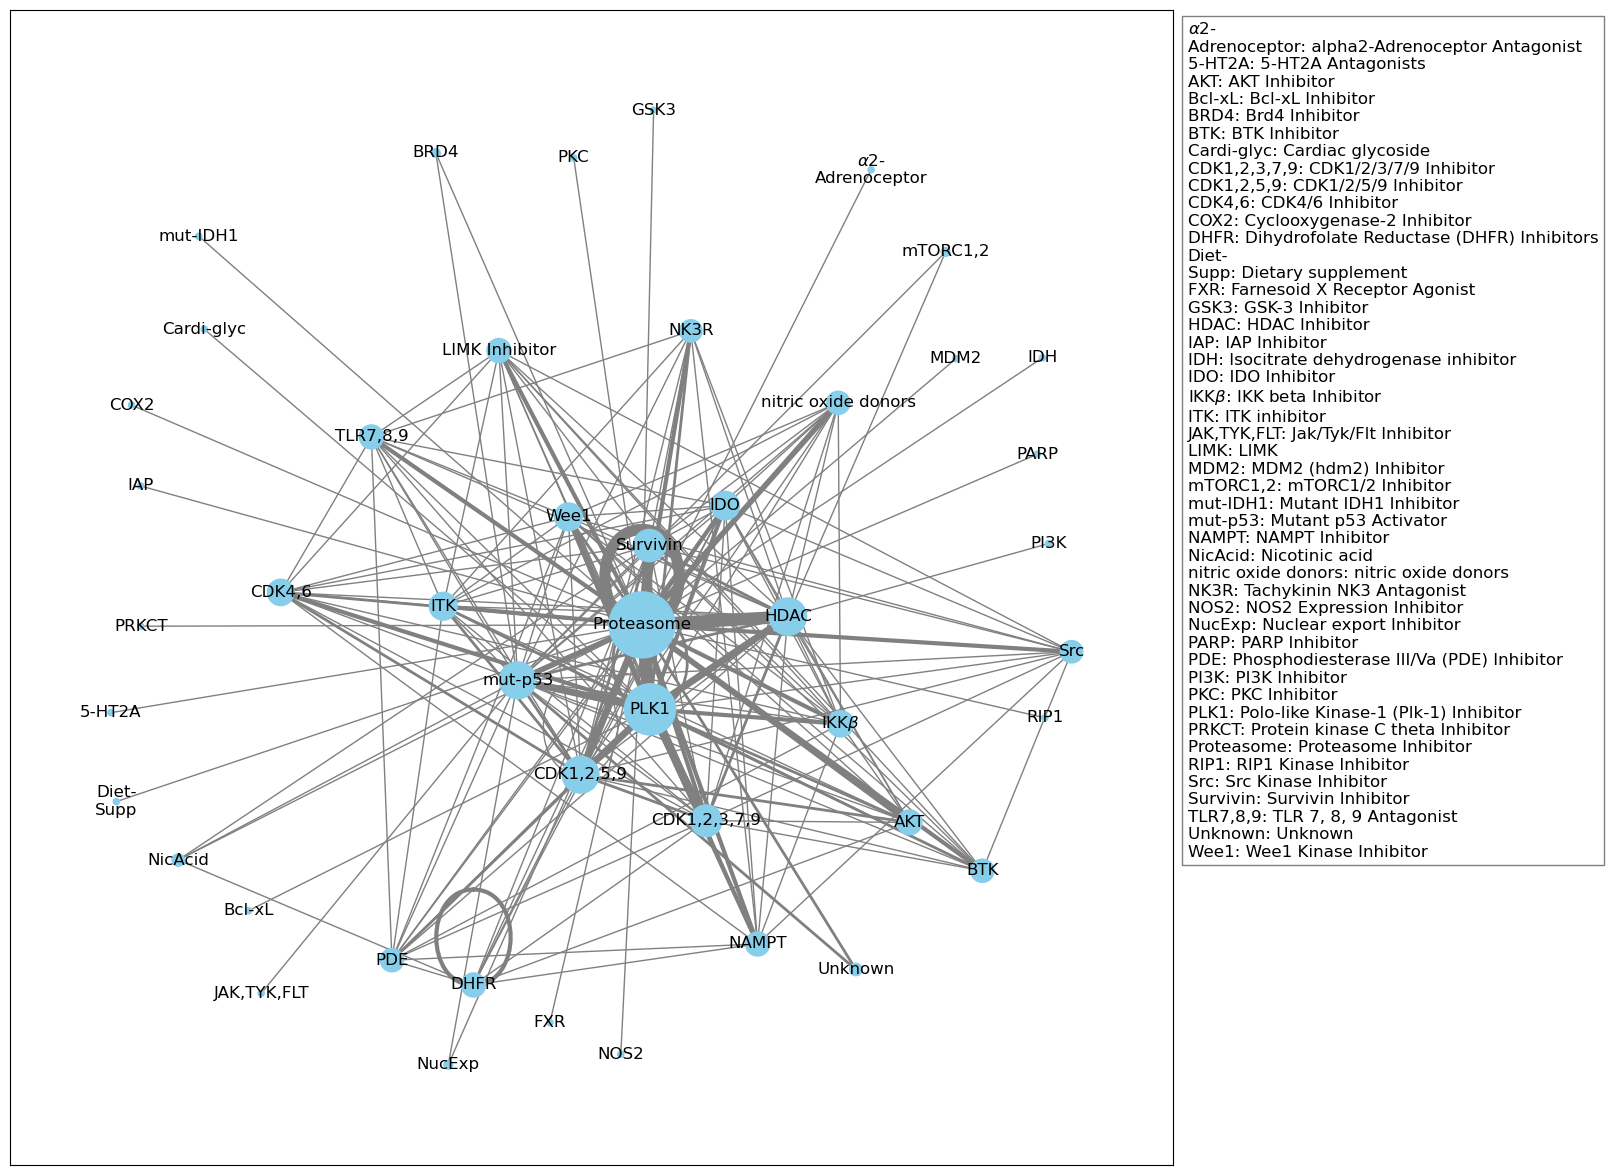

In [611]:
df = df_train_pred_syn.copy()

# Function to abbreviate mechanism names
def abbreviate_mechanism(name):
    return abbreviation_dict.get(name, name)

# Abbreviate MOA columns in the DataFrame
df["MOA 1"] = df["MOA 1"].apply(abbreviate_mechanism)
df["MOA 2"] = df["MOA 2"].apply(abbreviate_mechanism)

# Extract all mechanism pairs from the DataFrame
mechanism_pairs = list(zip(df["MOA 1"], df["MOA 2"]))

# Flatten the list of tuples to count the frequency of each mechanism
mechanisms = [mech for pair in mechanism_pairs for mech in pair]
mech_counter = Counter(mechanisms)

# Create a graph
G = nx.Graph()

# Add nodes for each mechanism of action
for mech in mech_counter:
    G.add_node(mech, size=mech_counter[mech])

# Add edges based on synergistic pairs
for mech1, mech2 in mechanism_pairs:
    if G.has_edge(mech1, mech2):
        G[mech1][mech2]['weight'] += 1
    else:
        G.add_edge(mech1, mech2, weight=1)

# Draw the network graph
plt.figure(figsize=(15,15))

# Position nodes using the spring layout
pos = nx.spring_layout(G, k=2, seed=30)

# Draw nodes with sizes proportional to their frequency, with a scaling factor of 20
sizes = [G.nodes[node]['size'] * 20 for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')

# Draw edges with thickness proportional to the weight
weights = [G[u][v]['weight'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=weights,edge_color='grey')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, verticalalignment='center')

#plt.title("Network Graph of Synergistic Drug Mechanisms of Action")

# Add a legend for abbreviations, truncating MOA names at the semicolon and sorting alphabetically
abbreviation_text = "\n".join(
    [f"{abbr}: {full.split('&')[0]}" for full, abbr in sorted(abbreviation_dict.items(), key=lambda item: item[1].lower())]
)
plt.gcf().text(0.91, 0.593, abbreviation_text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# plt.savefig('MoA_synergy.png', format='png', dpi=300, bbox_inches='tight')

In [612]:
# Extract and sort the weights of the edges in descending order
sorted_edges_desc = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Print the sorted edge weights
for edge in sorted_edges_desc:
    print(f"{edge[0]} - {edge[1]}: Weight = {edge[2]['weight']}")

Proteasome - HDAC: Weight = 9
Proteasome - PLK1: Weight = 9
Proteasome - Proteasome: Weight = 8
Proteasome - Survivin: Weight = 6
Proteasome - CDK1,2,5,9: Weight = 5
HDAC - PLK1: Weight = 5
PLK1 - CDK1,2,3,7,9: Weight = 5
PLK1 - CDK1,2,5,9: Weight = 5
PLK1 - mut-p53: Weight = 5
Proteasome - mut-p53: Weight = 4
Proteasome - AKT: Weight = 4
Proteasome - nitric oxide donors: Weight = 4
PLK1 - Survivin: Weight = 4
PLK1 - Wee1: Weight = 4
IKK$\beta$ - Proteasome: Weight = 3
IKK$\beta$ - PLK1: Weight = 3
NAMPT - Proteasome: Weight = 3
NAMPT - PLK1: Weight = 3
Src - Proteasome: Weight = 3
Proteasome - CDK1,2,3,7,9: Weight = 3
Proteasome - TLR7,8,9: Weight = 3
Proteasome - BTK: Weight = 3
Proteasome - IDO: Weight = 3
Proteasome - LIMK Inhibitor: Weight = 3
Proteasome - NK3R: Weight = 3
Proteasome - ITK: Weight = 3
CDK4,6 - PLK1: Weight = 3
IDO - PLK1: Weight = 3
DHFR - DHFR: Weight = 3
Proteasome - Wee1: Weight = 2
Proteasome - CDK4,6: Weight = 2
Proteasome - Unknown: Weight = 2
HDAC - Survivi

# Random pairs of compounds

In [615]:
print(df_train_pred_syn.columns)
df_train_pred_syn.head()

Index(['Gamma', 'Sample Name 1', 'Sample Name 2', 'MOA 1', 'MOA 2'], dtype='object')


,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2
2,0.605590,GMX-1778,Daporinad,IKK beta Inhibitor,NAMPT Inhibitor
3,0.906190,KX-01,Daporinad,Src Kinase Inhibitor,NAMPT Inhibitor
4,0.870655,Bortezomib,Daporinad,Proteasome Inhibitor,NAMPT Inhibitor
10,0.647755,Panobinostat,Daporinad,HDAC Inhibitor,NAMPT Inhibitor
11,0.363185,Carfilzomib,Daporinad,Proteasome Inhibitor,NAMPT Inhibitor


In [619]:
_1=tuple(zip(df_train_pred_syn['Sample Name 1'], df_train_pred_syn['MOA 1']))
_2=tuple(zip(df_train_pred_syn['Sample Name 2'], df_train_pred_syn['MOA 2']))
print(_1)
print(_2)

(('GMX-1778', 'IKK beta Inhibitor'), ('KX-01', 'Src Kinase Inhibitor'), ('Bortezomib', 'Proteasome Inhibitor'), ('Panobinostat', 'HDAC Inhibitor'), ('Carfilzomib', 'Proteasome Inhibitor'), ('Fascaplysin', 'CDK4/6 Inhibitor'), ('Oprozomib', 'Proteasome Inhibitor'), ('CAY-10581', 'IDO Inhibitor'), ('GW-843682X', 'Polo-like Kinase-1 (Plk-1) Inhibitor'), ('BMS-3', 'LIMK Inhibitor'), ('BI-2536', 'Polo-like Kinase-1 (Plk-1) Inhibitor'), ('Parogrelil', 'Phosphodiesterase III/Va (PDE) Inhibitor'), ('GSK-461364A', 'Polo-like Kinase-1 (Plk-1) Inhibitor'), ('Osanetant', 'Tachykinin NK3 Antagonist'), ('KX-01', 'Src Kinase Inhibitor'), ('HMSL10077', 'BTK Inhibitor'), ('Dinaciclib (SCH727965)', 'CDK1/2/5/9 Inhibitor'), ('Fascaplysin', 'CDK4/6 Inhibitor'), ('NSC-319726', 'Mutant p53 Activator'), ('IVX-214', 'Polo-like Kinase-1 (Plk-1) Inhibitor'), ('BMS-3', 'LIMK Inhibitor'), ('BS-194', 'CDK1/2/5/9 Inhibitor'), ('Akt-I-1,2', 'AKT Inhibitor'), ('JS-59-4', 'nitric oxide donors'), ('Parogrelil', 'Phosph

In [636]:
set_all_comp_moa=set(_1).union(set(_2))
print(len(set_all_comp_moa))
set_all_comp_moa

64


{('AGI-5198', 'Mutant IDH1 Inhibitor'),
 ('AZD-8055', 'mTORC1/2 Inhibitor'),
 ('Akt-I-1,2', 'AKT Inhibitor'),
 ('Aminopterin', 'Dihydrofolate Reductase (DHFR) Inhibitors'),
 ('BI-2536', 'Polo-like Kinase-1 (Plk-1) Inhibitor'),
 ('BMS-3', 'LIMK Inhibitor'),
 ('BS-194', 'CDK1/2/5/9 Inhibitor'),
 ('Bafilomycin A1 from Streptomyces griseus', 'Unknown'),
 ('Birinapant', 'IAP Inhibitor'),
 ('Bortezomib', 'Proteasome Inhibitor'),
 ('CAY-10581', 'IDO Inhibitor'),
 ('CPG-52364', 'TLR 7, 8, 9 Antagonist'),
 ('Carfilzomib', 'Proteasome Inhibitor'),
 ('Dacinostat', 'HDAC Inhibitor'),
 ('Daporinad', 'NAMPT Inhibitor'),
 ('Delanzomib', 'Proteasome Inhibitor'),
 ('Dinaciclib (SCH727965)', 'CDK1/2/5/9 Inhibitor'),
 ('Evodiamine',
  'Dietary supplement & part of traditional chinese medicines; alkaloid known to have several pharmacological effects including anti-tumor activity; inducer of apoptosis'),
 ('Fascaplysin', 'CDK4/6 Inhibitor'),
 ('GMX-1778', 'IKK beta Inhibitor'),
 ('GSK-461364A', 'Polo-like 

In [651]:
len(set_all_comp_moa)

64

In [662]:
#check if the number of compounds is len(set_all_comp_moa)
assert len(set_all_comp_moa) == len(\
pd.concat([df_train_pred_syn[['Sample Name 1','MOA 1']].rename(columns={'Sample Name 1':'Sample Name','MOA 1':'MOA'}),\
           df_train_pred_syn[['Sample Name 2','MOA 2']].rename(columns={'Sample Name 2':'Sample Name','MOA 2':'MOA'})])\
           .drop_duplicates(subset=['Sample Name','MOA'])\
)

In [687]:
dict_random_iterations={}
for seed in range (1000):
    print(seed)
    random.seed(seed)
    # Generate all combinations
    all_combinations = list(itertools.combinations(set_all_comp_moa, 2))
    #print(len(all_combinations))
    # Randomly sample 307 combinations
    random_combinations = random.sample(all_combinations, 307)
    #print(len(random_combinations))
    random_combinations
    #create a random dataframe with exactly 307 combination
    df_random_combinations=pd.DataFrame(random_combinations, columns=['Tuple 1', 'Tuple 2'])
    # Split the tuples into separate columns
    df_random_combinations[['Sample Name 1', 'MOA 1']] = pd.DataFrame(df_random_combinations['Tuple 1'].tolist(), index=df_random_combinations.index)
    df_random_combinations[['Sample Name 2', 'MOA 2']] = pd.DataFrame(df_random_combinations['Tuple 2'].tolist(), index=df_random_combinations.index)

    # Drop the original 'Tuple 1' and 'Tuple 2' columns
    df_random_combinations = df_random_combinations.drop(columns=['Tuple 1', 'Tuple 2'])

    df = df_random_combinations.copy()

    # Function to abbreviate mechanism names
    def abbreviate_mechanism(name):
        return abbreviation_dict.get(name, name)

    # Abbreviate MOA columns in the DataFrame
    df["MOA 1"] = df["MOA 1"].apply(abbreviate_mechanism)
    df["MOA 2"] = df["MOA 2"].apply(abbreviate_mechanism)

    # Extract all mechanism pairs from the DataFrame
    mechanism_pairs = list(zip(df["MOA 1"], df["MOA 2"]))

    # Flatten the list of tuples to count the frequency of each mechanism
    mechanisms = [mech for pair in mechanism_pairs for mech in pair]
    mech_counter = Counter(mechanisms)

    # Create a graph
    G = nx.Graph()

    # Add nodes for each mechanism of action
    for mech in mech_counter:
        G.add_node(mech, size=mech_counter[mech])

    # Add edges based on synergistic pairs
    for mech1, mech2 in mechanism_pairs:
        if G.has_edge(mech1, mech2):
            G[mech1][mech2]['weight'] += 1
        else:
            G.add_edge(mech1, mech2, weight=1)

    # Draw the network graph
    #plt.figure(figsize=(15,15))

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=2, seed=30)

    # Draw nodes with sizes proportional to their frequency, with a scaling factor of 20
    sizes = [G.nodes[node]['size'] * 20 for node in G.nodes]
    #nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')

    # Draw edges with thickness proportional to the weight
    weights = [G[u][v]['weight'] for u, v in G.edges]
    #nx.draw_networkx_edges(G, pos, width=weights,edge_color='grey')

    # Draw labels
    #nx.draw_networkx_labels(G, pos, font_size=12, verticalalignment='center')

    #plt.title("Network Graph of Synergistic Drug Mechanisms of Action")

    # Add a legend for abbreviations, truncating MOA names at the semicolon and sorting alphabetically
    abbreviation_text = "\n".join(
        [f"{abbr}: {full.split('&')[0]}" for full, abbr in sorted(abbreviation_dict.items(), key=lambda item: item[1].lower())]
    )
    #plt.gcf().text(0.91, 0.593, abbreviation_text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    # Extract and sort the weights of the edges in descending order
    dict_weights={}
    sorted_edges_desc = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Print the sorted edge weights
    for edge in sorted_edges_desc:
        #print(f"{edge[0]} - {edge[1]}: Weight = {edge[2]['weight']}")
        dict_weights[f"{edge[0]}-{edge[1]}"]=edge[2]['weight']
    dict_random_iterations[seed]=dict_weights

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [697]:
'HDAC-Proteasome' in dict_random_iterations[0].keys()

True

In [726]:
list_interesting_values=[]
for i in range(1000):
    if 'Proteasome-HDAC' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['Proteasome-HDAC'])
    elif 'HDAC-Proteasome' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['HDAC-Proteasome'])
    else:
        print('Not in the netwoek')

data = [list_interesting_values]
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))
print(f"{mean}+-{sem}")

Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
4.354417670682731+-1.8968078347738055


In [706]:
list_interesting_values=[]
for i in range(1000):
    if 'Proteasome-PLK1' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['Proteasome-PLK1'])
    elif 'PLK1-Proteasome' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['PLK1-Proteasome'])
    else:
        print('Not in the netwoek')
data = [list_interesting_values]
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))
print(f"{mean}+-{sem}")

Not in the netwoek
5.358358358358358+-2.1115456323799764


In [708]:
list_interesting_values=[]
for i in range(1000):
    if 'Proteasome-Proteasome' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['Proteasome-Proteasome'])
    # elif 'PLK1-Proteasome' in dict_random_iterations[i].keys():
    #     list_interesting_values.append(dict_random_iterations[i]['PLK1-Proteasome'])
    else:
        print('Not in the netwoek')
data = [list_interesting_values]
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))
print(f"{mean}+-{sem}")

Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
3.306185567010309+-1.5599684070383044


In [709]:
list_interesting_values=[]
for i in range(1000):
    if 'HDAC-mut-p53' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['HDAC-mut-p53'])
    elif 'mut-p53-HDAC' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['mut-p53-HDAC'])
    else:
        print('Not in the netwoek')
data = [list_interesting_values]
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))
print(f"{mean}+-{sem}")

Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the n

In [710]:
list_interesting_values=[]
for i in range(1000):
    if 'Proteasome-Survivin' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['Proteasome-Survivin'])
    elif 'Survivin-Proteasome' in dict_random_iterations[i].keys():
        list_interesting_values.append(dict_random_iterations[i]['Survivin-Proteasome'])
    else:
        print('Not in the netwoek')
data = [list_interesting_values]
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))
print(f"{mean}+-{sem}")

Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the netwoek
Not in the n

In [727]:
import itertools
import random
random.seed(0)
# Generate all combinations
all_combinations = list(itertools.combinations(set_all_comp_moa, 2))
print(len(all_combinations))
# Randomly sample 307 combinations
random_combinations = random.sample(all_combinations, 307)
print(len(random_combinations))
random_combinations


2016
307


[(('SB-216763', 'GSK-3 Inhibitor'),
  ('Volasertib', 'Polo-like Kinase-1 (Plk-1) Inhibitor')),
 (('Dinaciclib (SCH727965)', 'CDK1/2/5/9 Inhibitor'),
  ('Rucaparib', 'PARP Inhibitor')),
 (('Daporinad', 'NAMPT Inhibitor'), ('Quisinostat', 'HDAC Inhibitor')),
 (('Trichostatin A', 'HDAC Inhibitor'), ('Rucaparib', 'PARP Inhibitor')),
 (('Evodiamine',
   'Dietary supplement & part of traditional chinese medicines; alkaloid known to have several pharmacological effects including anti-tumor activity; inducer of apoptosis'),
  ('Parogrelil', 'Phosphodiesterase III/Va (PDE) Inhibitor')),
 (('BI-2536', 'Polo-like Kinase-1 (Plk-1) Inhibitor'),
  ('Delanzomib', 'Proteasome Inhibitor')),
 (('Proscillaridin', 'Cardiac glycoside'), ('Go-6983', 'PKC Inhibitor')),
 (('Ixazomib', 'Proteasome Inhibitor'), ('Rucaparib', 'PARP Inhibitor')),
 (('CPG-52364', 'TLR 7, 8, 9 Antagonist'), ('MG-132', 'Proteasome Inhibitor')),
 (('MK-1775', 'Wee1 Kinase Inhibitor'), ('Daporinad', 'NAMPT Inhibitor')),
 (('Akt-I-1,2'

In [728]:
#create a random dataframe with exactly 307 combination
df_random_combinations=pd.DataFrame(random_combinations, columns=['Tuple 1', 'Tuple 2'])
# Split the tuples into separate columns
df_random_combinations[['Sample Name 1', 'MOA 1']] = pd.DataFrame(df_random_combinations['Tuple 1'].tolist(), index=df_random_combinations.index)
df_random_combinations[['Sample Name 2', 'MOA 2']] = pd.DataFrame(df_random_combinations['Tuple 2'].tolist(), index=df_random_combinations.index)

# Drop the original 'Tuple 1' and 'Tuple 2' columns
df_random_combinations = df_random_combinations.drop(columns=['Tuple 1', 'Tuple 2'])
df_random_combinations

,Sample Name 1,MOA 1,Sample Name 2,MOA 2
0,SB-216763,GSK-3 Inhibitor,Volasertib,Polo-like Kinase-1 (Plk-1) Inhibitor
1,Dinaciclib (SCH727965),CDK1/2/5/9 Inhibitor,Rucaparib,PARP Inhibitor
2,Daporinad,NAMPT Inhibitor,Quisinostat,HDAC Inhibitor
3,Trichostatin A,HDAC Inhibitor,Rucaparib,PARP Inhibitor
4,Evodiamine,Dietary supplement & part of traditional chine...,Parogrelil,Phosphodiesterase III/Va (PDE) Inhibitor
...,...,...,...,...
302,Ketanserin,5-HT2A Antagonists,Bafilomycin A1 from Streptomyces griseus,Unknown
303,Melatonin,NOS2 Expression Inhibitor,SB-216763,GSK-3 Inhibitor
304,MG-115,Proteasome Inhibitor,Rucaparib,PARP Inhibitor
305,Ketanserin,5-HT2A Antagonists,UCN-01,Unknown


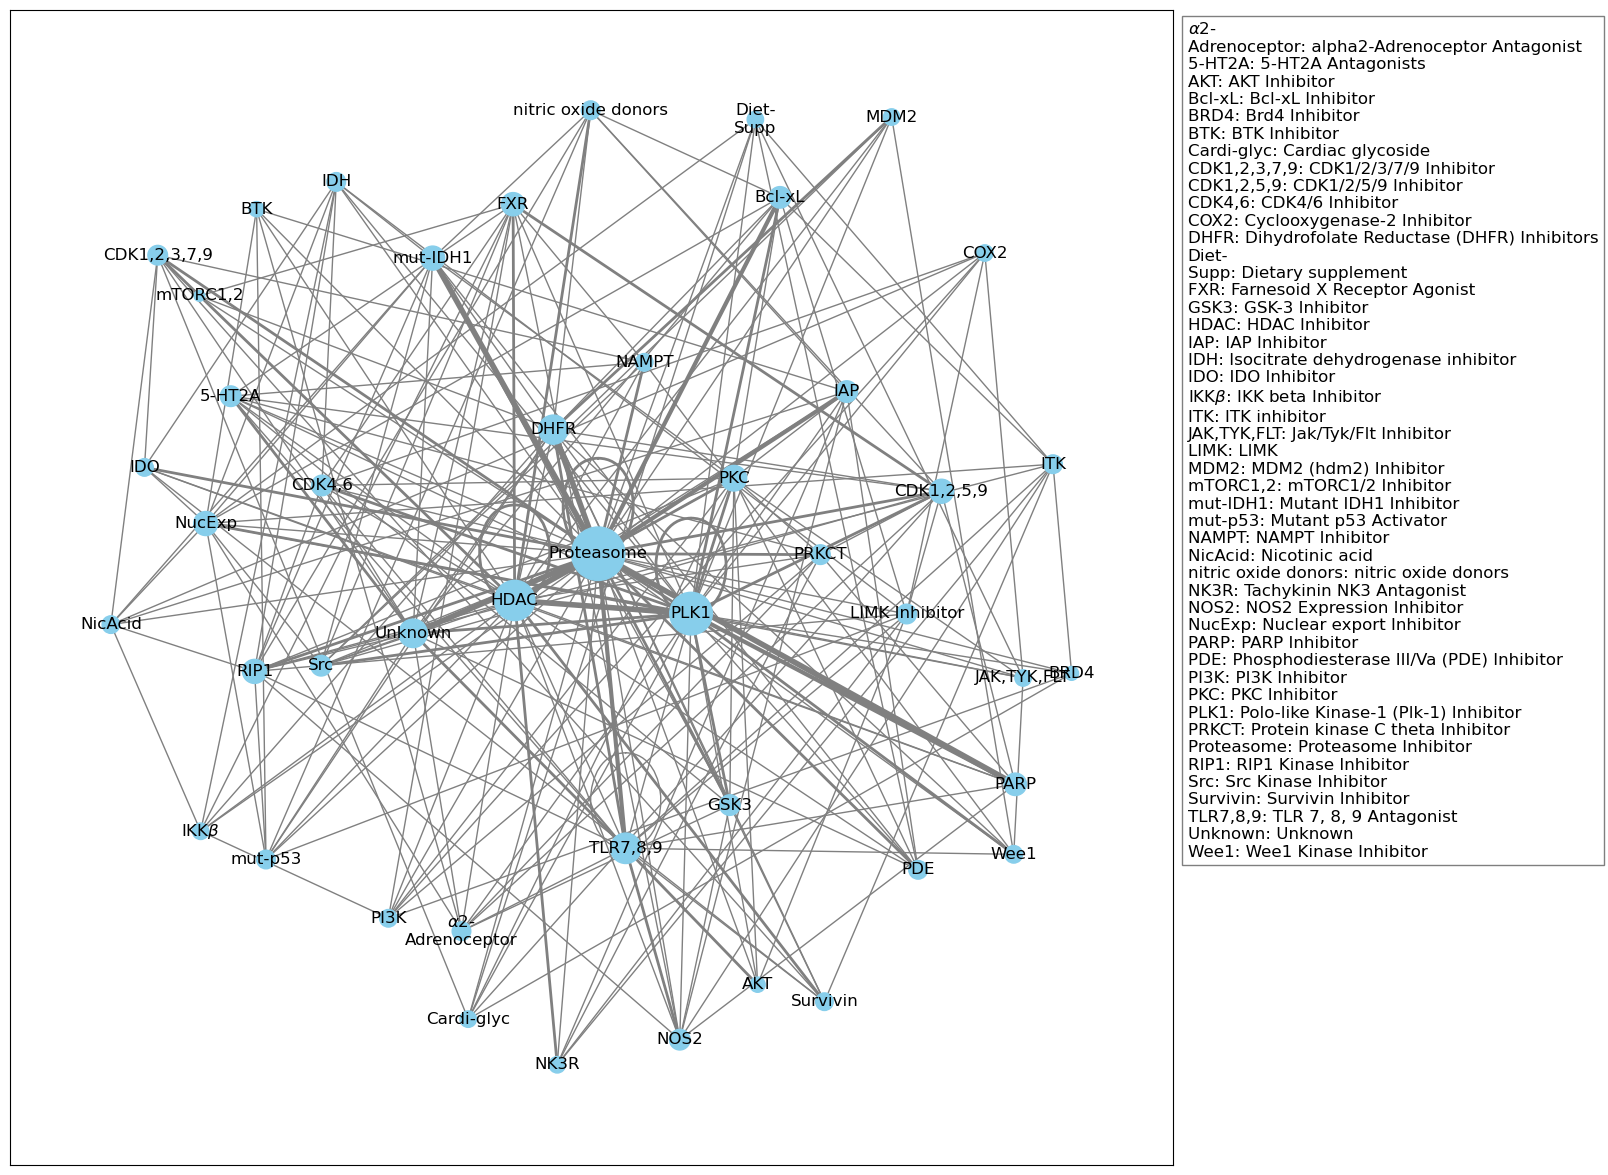

In [731]:
df = df_random_combinations.copy()

# Function to abbreviate mechanism names
def abbreviate_mechanism(name):
    return abbreviation_dict.get(name, name)

# Abbreviate MOA columns in the DataFrame
df["MOA 1"] = df["MOA 1"].apply(abbreviate_mechanism)
df["MOA 2"] = df["MOA 2"].apply(abbreviate_mechanism)

# Extract all mechanism pairs from the DataFrame
mechanism_pairs = list(zip(df["MOA 1"], df["MOA 2"]))

# Flatten the list of tuples to count the frequency of each mechanism
mechanisms = [mech for pair in mechanism_pairs for mech in pair]
mech_counter = Counter(mechanisms)

# Create a graph
G = nx.Graph()

# Add nodes for each mechanism of action
for mech in mech_counter:
    G.add_node(mech, size=mech_counter[mech])

# Add edges based on synergistic pairs
for mech1, mech2 in mechanism_pairs:
    if G.has_edge(mech1, mech2):
        G[mech1][mech2]['weight'] += 1
    else:
        G.add_edge(mech1, mech2, weight=1)

# Draw the network graph
plt.figure(figsize=(15,15))

# Position nodes using the spring layout
pos = nx.spring_layout(G, k=2, seed=30)

# Draw nodes with sizes proportional to their frequency, with a scaling factor of 20
sizes = [G.nodes[node]['size'] * 20 for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')

# Draw edges with thickness proportional to the weight
weights = [G[u][v]['weight'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=weights,edge_color='grey')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, verticalalignment='center')

#plt.title("Network Graph of Synergistic Drug Mechanisms of Action")

# Add a legend for abbreviations, truncating MOA names at the semicolon and sorting alphabetically
abbreviation_text = "\n".join(
    [f"{abbr}: {full.split('&')[0]}" for full, abbr in sorted(abbreviation_dict.items(), key=lambda item: item[1].lower())]
)
plt.gcf().text(0.91, 0.593, abbreviation_text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('MoA_synergy_random.png', format='png', dpi=300, bbox_inches='tight')

In [730]:
# Extract and sort the weights of the edges in descending order
dict_weights={}
sorted_edges_desc = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Print the sorted edge weights
for edge in sorted_edges_desc:
    print(f"{edge[0]} - {edge[1]}: Weight = {edge[2]['weight']}")
    dict_weights[f"{edge[0]}-{edge[1]}"]=edge[2]['weight']


PLK1 - HDAC: Weight = 4
PARP - Proteasome: Weight = 4
HDAC - Proteasome: Weight = 4
Proteasome - mut-IDH1: Weight = 4
Proteasome - DHFR: Weight = 4
Proteasome - Unknown: Weight = 4
PLK1 - PARP: Weight = 3
Proteasome - TLR7,8,9: Weight = 3
Proteasome - Bcl-xL: Weight = 3
Proteasome - IAP: Weight = 3
GSK3 - PLK1: Weight = 2
GSK3 - Proteasome: Weight = 2
PLK1 - Proteasome: Weight = 2
PLK1 - NucExp: Weight = 2
PLK1 - Bcl-xL: Weight = 2
PLK1 - PLK1: Weight = 2
PLK1 - Unknown: Weight = 2
PLK1 - Src: Weight = 2
PLK1 - CDK4,6: Weight = 2
PLK1 - Wee1: Weight = 2
PLK1 - CDK1,2,5,9: Weight = 2
PLK1 - PKC: Weight = 2
CDK1,2,5,9 - Proteasome: Weight = 2
CDK1,2,5,9 - FXR: Weight = 2
NAMPT - Proteasome: Weight = 2
HDAC - Survivin: Weight = 2
HDAC - CDK1,2,3,7,9: Weight = 2
HDAC - nitric oxide donors: Weight = 2
HDAC - FXR: Weight = 2
HDAC - NK3R: Weight = 2
HDAC - HDAC: Weight = 2
PDE - Proteasome: Weight = 2
Proteasome - Proteasome: Weight = 2
Proteasome - PKC: Weight = 2
Proteasome - IDO: Weight = 

---

In [54]:
import numpy as np

Final saved figure size: 3.48 inches x 3.46 inches (at 300 dpi)


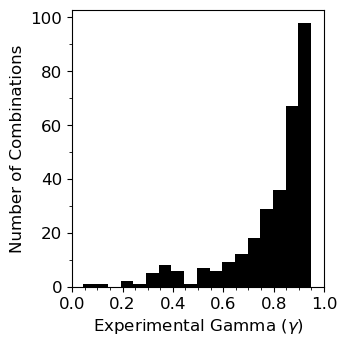

In [66]:
# Define the number of bins
num_bins = int((df_train_pred_syn['Gamma'].max() - df_train_pred_syn['Gamma'].min()) / 0.05)

# Define the bin edges using linspace, ensuring the last bin ends at the max value
bins = np.linspace(df_train_pred_syn['Gamma'].min(), df_train_pred_syn['Gamma'].max(), num_bins + 1)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(3.25,3.6))

# Plot the histogram
ax.hist(df_train_pred_syn['Gamma'], bins=bins,color='black')

# Set the x and y limits
ax.set_xlim(0,1)
# ax.set_ylim(0, df_train_pred_syn['Gamma'].value_counts().max() + 10)  # Adjust the y-limit as needed

# Set major and minor ticks for the x-axis
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

# Set major and minor ticks for the y-axis
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlabel(r'Experimental Gamma ($\gamma$)', fontsize=12)  # Greek letter gamma
ax.set_ylabel('Number of Combinations', fontsize=12)
# Optionally, customize the tick appearance (e.g., tick length, width)
ax.tick_params(axis='both', labelsize=12)
plt.savefig('synergy_dist.png', format='png', dpi=300, bbox_inches='tight')
from PIL import Image
filename='synergy_dist.png'
with Image.open(filename) as img:
    width, height = img.size
    print(f"Final saved figure size: {width / 300:.2f} inches x {height / 300:.2f} inches (at 300 dpi)")


In [64]:
! pwd

/Users/mohsenpourmousa/Documents/Personal/Past Research/PANC1_mohsen


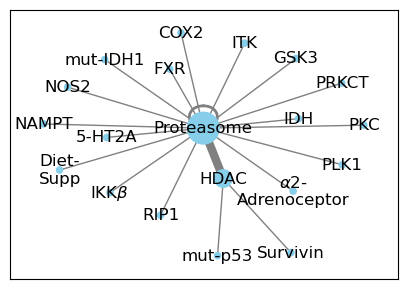

In [287]:
df = df_train_pred_syn[df_train_pred_syn['Gamma']<0.5].copy()

# Function to abbreviate mechanism names
def abbreviate_mechanism(name):
    return abbreviation_dict.get(name, name)

# Abbreviate MOA columns in the DataFrame
df["MOA 1"] = df["MOA 1"].apply(abbreviate_mechanism)
df["MOA 2"] = df["MOA 2"].apply(abbreviate_mechanism)

# Extract all mechanism pairs from the DataFrame
mechanism_pairs = list(zip(df["MOA 1"], df["MOA 2"]))

# Flatten the list of tuples to count the frequency of each mechanism
mechanisms = [mech for pair in mechanism_pairs for mech in pair]
mech_counter = Counter(mechanisms)

# Create a graph
G = nx.Graph()

# Add nodes for each mechanism of action
for mech in mech_counter:
    G.add_node(mech, size=mech_counter[mech])

# Add edges based on synergistic pairs
for mech1, mech2 in mechanism_pairs:
    if G.has_edge(mech1, mech2):
        G[mech1][mech2]['weight'] += 1
    else:
        G.add_edge(mech1, mech2, weight=1)

# Draw the network graph
plt.figure(figsize=(5,3.5))

# Position nodes using the spring layout
pos = nx.spring_layout(G, k=1, seed=15)

# Draw nodes with sizes proportional to their frequency, with a scaling factor of 20
sizes = [G.nodes[node]['size'] * 20 for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')
# Draw edges with thickness proportional to the weight
weights = [G[u][v]['weight'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='grey')

# Annotate edges with their corresponding weights
for (u, v, d) in G.edges(data=True):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    x_mid, y_mid = (x1 + x2) / 2, (y1 + y2) / 2  # Calculate midpoints for placing text
    #plt.text(x_mid, y_mid, str(d['weight']), fontsize=12, ha='center', va='center', color='black')


# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, verticalalignment='center')

#plt.title("Network Graph of Synergistic Drug Mechanisms of Action")

# Add a legend for abbreviations, truncating MOA names at the semicolon and sorting alphabetically
abbreviation_text = "\n".join(
    [f"{abbr}: {full.split('&')[0]}" for full, abbr in sorted(abbreviation_dict.items(), key=lambda item: item[1].lower())]
)
#plt.gcf().text(0.91, 0.61, abbreviation_text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('MoA_synergy_0.5.png', format='png', dpi=300, bbox_inches='tight')

In [288]:
# Extract and sort the weights of the edges in descending order
sorted_edges_desc = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Print the sorted edge weights
for edge in sorted_edges_desc:
    print(f"{edge[0]} - {edge[1]}: Weight = {edge[2]['weight']}")

Proteasome - HDAC: Weight = 6
Proteasome - Proteasome: Weight = 2
Proteasome - NAMPT: Weight = 1
Proteasome - IKK$\beta$: Weight = 1
Proteasome - PLK1: Weight = 1
Proteasome - ITK: Weight = 1
Proteasome - RIP1: Weight = 1
Proteasome - Diet-
Supp: Weight = 1
Proteasome - PKC: Weight = 1
Proteasome - PRKCT: Weight = 1
Proteasome - COX2: Weight = 1
Proteasome - NOS2: Weight = 1
Proteasome - mut-IDH1: Weight = 1
Proteasome - FXR: Weight = 1
Proteasome - $\alpha$2-
Adrenoceptor: Weight = 1
Proteasome - GSK3: Weight = 1
Proteasome - IDH: Weight = 1
Proteasome - 5-HT2A: Weight = 1
HDAC - mut-p53: Weight = 1
HDAC - Survivin: Weight = 1


In [180]:
for index,row in df_prediction_colname_edited.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if 'AZD' in comp1:
        print(index,comp1,row['MOA 1'])
    if 'AZD' in comp2:
        print(index,comp2, row['MOA 2'])

0 AZD-8055 mTORC1/2 Inhibitor
18 AZD-8055 mTORC1/2 Inhibitor


In [181]:
for index,row in df_prediction_colname_edited.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if '319726' in comp1:
        print(index,comp1,row['MOA 1'])
    if '319726' in comp2:
        print(index,comp2, row['MOA 2'])

0 NSC-319726 Mutant p53 Activator
1 NSC-319726 Mutant p53 Activator
2 NSC-319726 Mutant p53 Activator
3 NSC-319726 Mutant p53 Activator
4 NSC-319726 Mutant p53 Activator
5 NSC-319726 Mutant p53 Activator
7 NSC-319726 Mutant p53 Activator
19 NSC-319726 Mutant p53 Activator
61 NSC-319726 Mutant p53 Activator
68 NSC-319726 Mutant p53 Activator
86 NSC-319726 Mutant p53 Activator


In [182]:
for index,row in df_prediction_colname_edited.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if 'Panobinostat' in comp1:
        print(index,comp1,row['MOA 1'])
        break
    if 'Panobinostat' in comp2:
        print(index,comp2, row['MOA 2'])
        break

13 Panobinostat HDAC Inhibitor


In [183]:
for index,row in df_prediction_colname_edited.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if 'Bortezomib' in comp1:
        print(index,comp1,row['MOA 1'])
        break
    if 'Bortezomib' in comp2:
        print(index,comp2, row['MOA 2'])
        break

In [184]:
for index,row in df_training_colname_edited.iterrows():
    comp1=row['Sample Name 1']
    comp2=row['Sample Name 2']
    if 'Bortezomib' in comp1:
        print(index,comp1,row['MOA 1'])
        break
    if 'Bortezomib' in comp2:
        print(index,comp2, row['MOA 2'])
        break

4 Bortezomib Proteasome Inhibitor


In [185]:
for index,row in df_train_pred_syn[df_train_pred_syn['Gamma']<0.5].iterrows():
    moa1=row['MOA 1']
    moa2=row['MOA 2']
    if ( (moa1=='Proteasome Inhibitor') and (moa2=='HDAC Inhibitor') ) or ( (moa2=='Proteasome Inhibitor') and (moa1=='HDAC Inhibitor') ):
        print(row['Sample Name 1'],row['Sample Name 2'])

Panobinostat Bortezomib
Oprozomib Panobinostat
Panobinostat Carfilzomib
Dacinostat Carfilzomib
Trichostatin A Carfilzomib
Quisinostat Carfilzomib


In [289]:
print(len(df_train_pred_syn[df_train_pred_syn['Gamma']<0.5]),len(df_train_pred_syn))
df_train_pred_syn[df_train_pred_syn['Gamma']<0.5].sort_values(by='Gamma')

26 307


,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2
208,0.041410,Panobinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor
191,0.107620,Oprozomib,Panobinostat,Proteasome Inhibitor,HDAC Inhibitor
25,0.224465,Trichostatin A,Sepantronium bromide,HDAC Inhibitor,Survivin Inhibitor
46,0.239500,Trichostatin A,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor
54,0.259860,Quisinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor
193,0.298825,NSC-319726,Panobinostat,Mutant p53 Activator,HDAC Inhibitor
59,0.304785,NCGC00262689,Carfilzomib,Isocitrate dehydrogenase inhibitor,Proteasome Inhibitor
341,0.304980,Carfilzomib,NCGC00188382-01,Proteasome Inhibitor,ITK inhibitor
47,0.307715,AGI-5198,Carfilzomib,Mutant IDH1 Inhibitor,Proteasome Inhibitor
35,0.335060,Sotrastaurin,Carfilzomib,Protein kinase C theta Inhibitor,Proteasome Inhibitor


In [290]:
df_train_pred_syn[df_train_pred_syn['Gamma']<0.5].sort_values(by='Gamma').to_csv('synergy_0.5.csv',index=False)

In [322]:
! pwd

/Users/mohsenpourmousa/Documents/Personal/Past Research/PANC1_mohsen


In [431]:
import ast
df_train_pred_syn_w_genes=pd.read_csv('synergy_0.5_filled_w_python_final.csv',converters={'Gene 1': ast.literal_eval,'Gene 2': ast.literal_eval})

In [432]:
df_train_pred_syn_w_genes

,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2,Gene 1,Gene 2
0,0.041410,Panobinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."
1,0.107620,Oprozomib,Panobinostat,Proteasome Inhibitor,HDAC Inhibitor,"[ADRM1, PRB2, PSMA1, PSMA2, PSMA3, PSMA4, PSMA...","[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA..."
2,0.224465,Trichostatin A,Sepantronium bromide,HDAC Inhibitor,Survivin Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, BECN1, BIRC5, CASP3, CASP9, EGF, EGFR,..."
3,0.239500,Trichostatin A,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."
4,0.259860,Quisinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[HDAC1, HDAC10, HDAC11, HDAC2, HDAC3, HDAC4, H...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."
5,0.298825,NSC-319726,Panobinostat,Mutant p53 Activator,HDAC Inhibitor,[TP53],"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA..."
6,0.304785,NCGC00262689,Carfilzomib,Isocitrate dehydrogenase inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."
7,0.304980,Carfilzomib,NCGC00188382-01,Proteasome Inhibitor,ITK inhibitor,"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",[ITK]
8,0.307715,AGI-5198,Carfilzomib,Mutant IDH1 Inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."
9,0.335060,Sotrastaurin,Carfilzomib,Protein kinase C theta Inhibitor,Proteasome Inhibitor,"[AKT1, AKT2, AVP, BRSK1, CAMK1D, CAMK2A, CAMK2...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO..."


In [433]:
df_g2d=pd.read_csv('2024-08-28_MohsenGeneCombos.csv')
df_g2d

,Unnamed: 0,Sample1,Sample2,Combination,Num_G2D_hits
0,1,Panobinostat,Carfilzomib,Panobinostat_Carfilzomib,117
1,2,Oprozomib,Panobinostat,Oprozomib_Panobinostat,48
2,3,Trichostatin A,Sepantronium bromide,Trichostatin A_Sepantronium bromide,598
3,4,Trichostatin A,Carfilzomib,Trichostatin A_Carfilzomib,746
4,5,Quisinostat,Carfilzomib,Quisinostat_Carfilzomib,1
5,6,NSC-319726,Panobinostat,NSC-319726_Panobinostat,2
6,7,NCGC00262689,Carfilzomib,NCGC00262689_Carfilzomib,2
7,8,Carfilzomib,NCGC00188382-01,Carfilzomib_NCGC00188382-01,1
8,9,AGI-5198,Carfilzomib,AGI-5198_Carfilzomib,2
9,10,Sotrastaurin,Carfilzomib,Sotrastaurin_Carfilzomib,13


In [435]:
df_concat=\
pd.concat([df_train_pred_syn_w_genes,df_g2d],axis=1)
df_concat

,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2,Gene 1,Gene 2,Unnamed: 0,Sample1,Sample2,Combination,Num_G2D_hits
0,0.041410,Panobinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",1,Panobinostat,Carfilzomib,Panobinostat_Carfilzomib,117
1,0.107620,Oprozomib,Panobinostat,Proteasome Inhibitor,HDAC Inhibitor,"[ADRM1, PRB2, PSMA1, PSMA2, PSMA3, PSMA4, PSMA...","[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...",2,Oprozomib,Panobinostat,Oprozomib_Panobinostat,48
2,0.224465,Trichostatin A,Sepantronium bromide,HDAC Inhibitor,Survivin Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, BECN1, BIRC5, CASP3, CASP9, EGF, EGFR,...",3,Trichostatin A,Sepantronium bromide,Trichostatin A_Sepantronium bromide,598
3,0.239500,Trichostatin A,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",4,Trichostatin A,Carfilzomib,Trichostatin A_Carfilzomib,746
4,0.259860,Quisinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[HDAC1, HDAC10, HDAC11, HDAC2, HDAC3, HDAC4, H...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",5,Quisinostat,Carfilzomib,Quisinostat_Carfilzomib,1
5,0.298825,NSC-319726,Panobinostat,Mutant p53 Activator,HDAC Inhibitor,[TP53],"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...",6,NSC-319726,Panobinostat,NSC-319726_Panobinostat,2
6,0.304785,NCGC00262689,Carfilzomib,Isocitrate dehydrogenase inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",7,NCGC00262689,Carfilzomib,NCGC00262689_Carfilzomib,2
7,0.304980,Carfilzomib,NCGC00188382-01,Proteasome Inhibitor,ITK inhibitor,"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",[ITK],8,Carfilzomib,NCGC00188382-01,Carfilzomib_NCGC00188382-01,1
8,0.307715,AGI-5198,Carfilzomib,Mutant IDH1 Inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",9,AGI-5198,Carfilzomib,AGI-5198_Carfilzomib,2
9,0.335060,Sotrastaurin,Carfilzomib,Protein kinase C theta Inhibitor,Proteasome Inhibitor,"[AKT1, AKT2, AVP, BRSK1, CAMK1D, CAMK2A, CAMK2...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",10,Sotrastaurin,Carfilzomib,Sotrastaurin_Carfilzomib,13


In [440]:
df_concat['Number of Gene 1']=0
df_concat['Number of Gene 2']=0
for index,row in df_concat.iterrows():
    assert row['Sample Name 1']==row['Sample1']
    assert row['Sample Name 2']==row['Sample2']
    df_concat.at[index,'Number of Gene 1']=len(row['Gene 1'])
    df_concat.at[index,'Number of Gene 2']=len(row['Gene 2'])

In [449]:
df_concat

,Gamma,Sample Name 1,Sample Name 2,MOA 1,MOA 2,Gene 1,Gene 2,Unnamed: 0,Sample1,Sample2,Combination,Num_G2D_hits,Number of Gene 1,Number of Gene 2
0,0.041410,Panobinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",1,Panobinostat,Carfilzomib,Panobinostat_Carfilzomib,117,1379,74
1,0.107620,Oprozomib,Panobinostat,Proteasome Inhibitor,HDAC Inhibitor,"[ADRM1, PRB2, PSMA1, PSMA2, PSMA3, PSMA4, PSMA...","[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...",2,Oprozomib,Panobinostat,Oprozomib_Panobinostat,48,39,1379
2,0.224465,Trichostatin A,Sepantronium bromide,HDAC Inhibitor,Survivin Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, BECN1, BIRC5, CASP3, CASP9, EGF, EGFR,...",3,Trichostatin A,Sepantronium bromide,Trichostatin A_Sepantronium bromide,598,5131,17
3,0.239500,Trichostatin A,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[A2M, AAK1, AAMDC, ABAT, ABCA1, ABCA13, ABCA5,...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",4,Trichostatin A,Carfilzomib,Trichostatin A_Carfilzomib,746,5131,74
4,0.259860,Quisinostat,Carfilzomib,HDAC Inhibitor,Proteasome Inhibitor,"[HDAC1, HDAC10, HDAC11, HDAC2, HDAC3, HDAC4, H...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",5,Quisinostat,Carfilzomib,Quisinostat_Carfilzomib,1,11,74
5,0.298825,NSC-319726,Panobinostat,Mutant p53 Activator,HDAC Inhibitor,[TP53],"[ABAT, ABCA5, ABCB1, ABCG2, ABHD14A, ABL1, ACA...",6,NSC-319726,Panobinostat,NSC-319726_Panobinostat,2,1,1379
6,0.304785,NCGC00262689,Carfilzomib,Isocitrate dehydrogenase inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",7,NCGC00262689,Carfilzomib,NCGC00262689_Carfilzomib,2,1,74
7,0.304980,Carfilzomib,NCGC00188382-01,Proteasome Inhibitor,ITK inhibitor,"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",[ITK],8,Carfilzomib,NCGC00188382-01,Carfilzomib_NCGC00188382-01,1,74,1
8,0.307715,AGI-5198,Carfilzomib,Mutant IDH1 Inhibitor,Proteasome Inhibitor,[IDH1],"[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",9,AGI-5198,Carfilzomib,AGI-5198_Carfilzomib,2,1,74
9,0.335060,Sotrastaurin,Carfilzomib,Protein kinase C theta Inhibitor,Proteasome Inhibitor,"[AKT1, AKT2, AVP, BRSK1, CAMK1D, CAMK2A, CAMK2...","[ABCB1, ADRM1, AR, BRCA1, BRD4, BSG, CASP3, CO...",10,Sotrastaurin,Carfilzomib,Sotrastaurin_Carfilzomib,13,58,74


<Axes: >

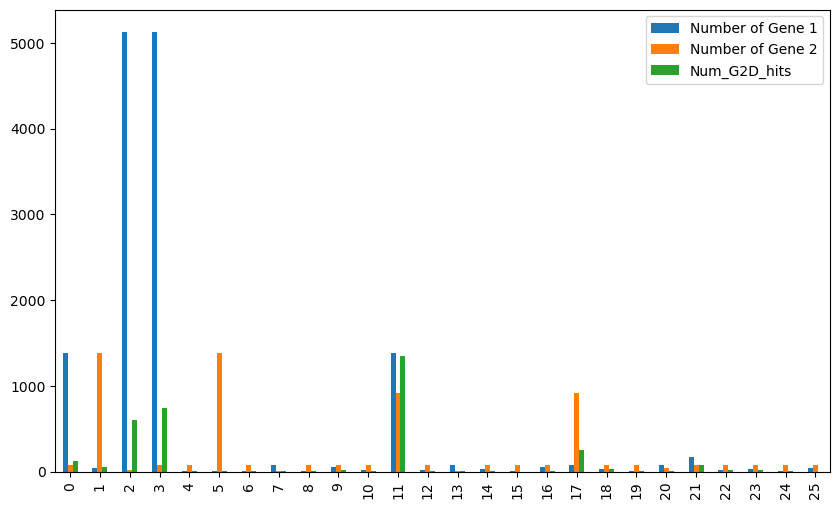

In [452]:
fig, ax = plt.subplots(figsize=(10, 6))
df_concat[['Number of Gene 1', 'Number of Gene 2','Num_G2D_hits']].plot(kind='bar', ax=ax)

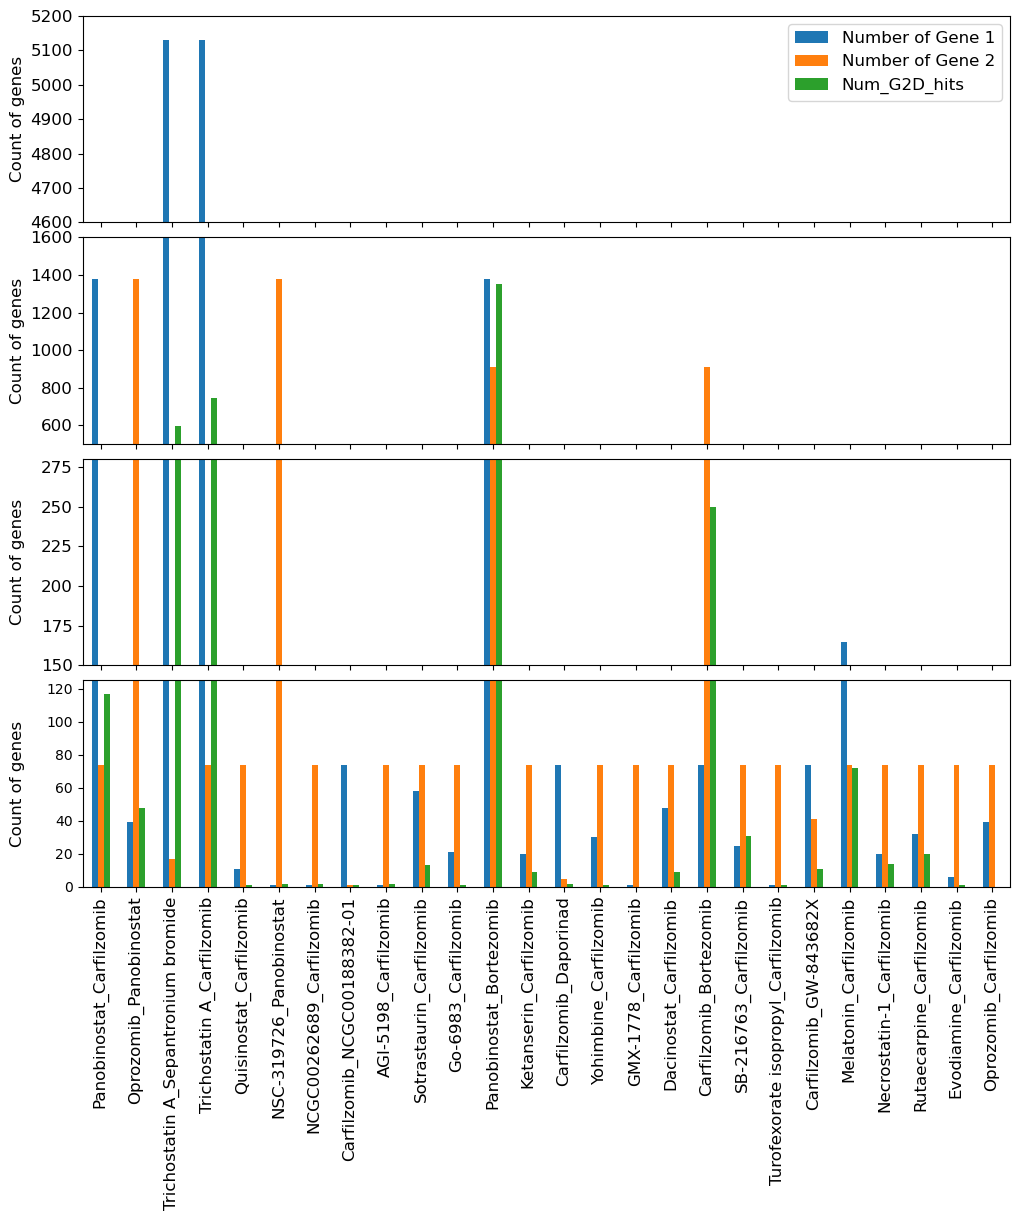

In [507]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

df_concat[['Number of Gene 1', 'Number of Gene 2', 'Num_G2D_hits']].plot(kind='bar', ax=ax[0])
ax[0].set_ylim(4600, 5200)
ax[0].legend(loc='upper right', fontsize=12)

df_concat[['Number of Gene 1', 'Number of Gene 2', 'Num_G2D_hits']].plot(kind='bar', ax=ax[1], legend=False)
ax[1].set_ylim(500, 1600)

df_concat[['Number of Gene 1', 'Number of Gene 2', 'Num_G2D_hits']].plot(kind='bar', ax=ax[2], legend=False)
ax[2].set_ylim(150, 280)

# Plot the last subplot with 'Combination' as the x-axis and vertical labels
df_concat.plot(kind='bar', x='Combination', y=['Number of Gene 1', 'Number of Gene 2', 'Num_G2D_hits'], ax=ax[3], legend=False)
ax[3].set_ylim(0, 125)
ax[3].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels
ax[3].set_xlabel('')

for i in range(3):
    ax[i].set_xticklabels([])
    ax[i].tick_params(axis='y', rotation=0, labelsize=12)
    ax[i].set_ylabel('Count of genes', fontsize=12)
ax[3].set_ylabel('Count of genes', fontsize=12)
# Align y-axis labels
fig.align_ylabels(ax)

plt.tight_layout(pad=0)
plt.savefig('G2D_hits.png', format='png', dpi=300, bbox_inches='tight')


In [515]:
df_concat['Hit Rate']=100*df_concat['Num_G2D_hits']/(df_concat['Number of Gene 1']*df_concat['Number of Gene 2'])

Text(0, 0.5, '% Hit Rate')

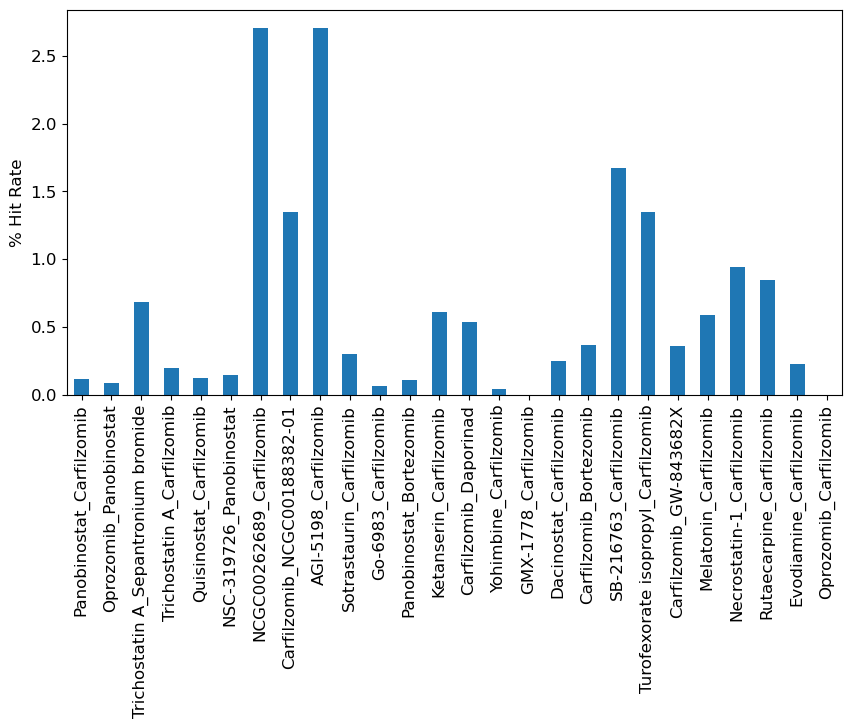

In [521]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

df_concat.plot(kind='bar', x='Combination', y=['Hit Rate'], ax=ax, legend=False)
ax.tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels
ax.set_xlabel('')

ax.tick_params(axis='y', rotation=0, labelsize=12)
ax.set_ylabel('% Hit Rate', fontsize=12)

In [ ]:
df_concat['Num_G2D_hits']/(df_concat['Number of Gene 1']*df_concat['Number of Gene 2'])

In [538]:
for index, row in df_concat.iterrows():
    set1=set(row['Gene 1'])
    set2=set(row['Gene 2'])
    common=set1.intersection(set2)
    print(index,len(common))
    adjusted_hit_rate=100*row['Num_G2D_hits']/(row['Number of Gene 1']*row['Number of Gene 2']-len(common)*len(common))
    df_concat.at[index,'Adjusted Hit Rate']=adjusted_hit_rate

    

0 6
1 0
2 15
3 22
4 0
5 1
6 0
7 0
8 0
9 1
10 1
11 108
12 1
13 0
14 1
15 0
16 2
17 71
18 2
19 0
20 1
21 9
22 2
23 2
24 0
25 39


In [537]:
df_concat[['Hit Rate','Adjusted Hit Rate']]

,Hit Rate,Adjusted Hit Rate
0,0.114654,0.114695
1,0.089251,0.089251
2,0.685568,0.687341
3,0.196474,0.196725
4,0.122850,0.122850
5,0.145033,0.145138
6,2.702703,2.702703
7,1.351351,1.351351
8,2.702703,2.702703
9,0.302889,0.302960


Text(0, 0.5, '% Hit Rate')

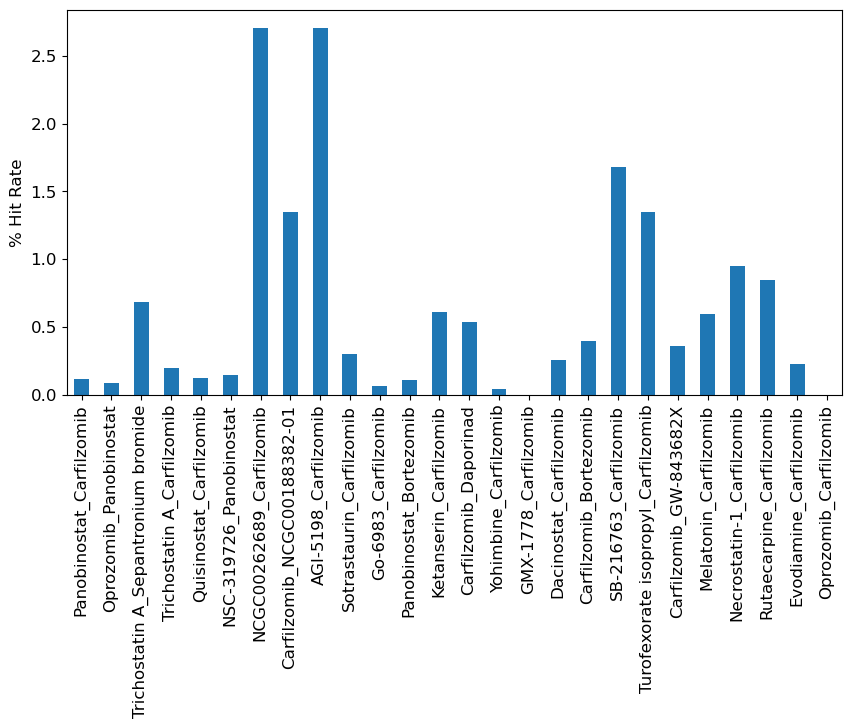

In [535]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

df_concat.plot(kind='bar', x='Combination', y=['Adjusted Hit Rate'], ax=ax, legend=False)
ax.tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x-axis labels
ax.set_xlabel('')

ax.tick_params(axis='y', rotation=0, labelsize=12)
ax.set_ylabel('% Hit Rate', fontsize=12)